<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Выпускная квалификационная работа Мациевской Светланы

слушателя курса "Data Science" Образовательного центра Московского государственного технического университета им. Н.Э. Баумана

Тема исследования: Прогнозирование конечных свойств новых материалов (композиционных материалов). 
Цель исследования: 	Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении; 	Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
Итог работы: Разработка приложения с графическим интерфейсом, которое будет выдавать прогноз параметра «соотношение матрица-наполнитель».

Импортируем сразу все необходимые библиотеки для нашего исследования

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [86]:
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

Загружаем исходные данные из обеих excel таблиц и удаляем колонку с индексом

In [35]:
#Загружаем первый датасет и посмотрим на названия столбцов
df_bp = pd.read_excel('X_bp.xlsx')
df_bp.shape

(1023, 11)

In [36]:
df_bp.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [37]:
# Удаляем первый столбец, в котором нумеруются строки, так как это не признак, а только нумерация, с помощью которой мы объединила файлы.

df_bp.drop(df_bp.columns[df_bp.columns.str.contains('unnamed', case=False)],
           axis=1,
           inplace=True)

df_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [38]:
# Проверим размерность первого файла
df_bp.shape

(1023, 10)

In [39]:
# Загружаем второй датасет
df_nup = pd.read_excel('X_nup.xlsx')
df_nup.shape

(1040, 4)

In [40]:
df_nup.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.0,57.0
1,1.0,0.0,4.0,60.0
2,2.0,0.0,4.0,70.0
3,3.0,0.0,5.0,47.0
4,4.0,0.0,5.0,57.0


In [41]:
#Удаляем первый неинформативный столбец
df_nup.drop(df_nup.columns[df_nup.columns.str.contains('unnamed', case=False)],
           axis=1,
           inplace=True)

df_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,4.0,57.0
1,0.0,4.0,60.0
2,0.0,4.0,70.0
3,0.0,5.0,47.0
4,0.0,5.0,57.0


In [42]:
# Проверим размерность второго файла
df_nup.shape

(1040, 3)

Объединим по индексу, тип объединения INNER, смотрим итоговый датасет

In [43]:
# Понимаем, что эти два датасета имеют разный объем строк. 
# Но наша задача собрать исходные данные файлы в один, единый набор данных. 
# По условию задачи объединяем их по типу INNER. 
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


Проверяем размеры данных

In [44]:
#Посмотрим количество колонок и столбцов
df.shape
# Итоговый датасет имеет 13 столбцов и 1023 строки, 
#17 строк из таблицы X_nup было отброшено,т.е часть данных удалена на начальном этапе исследования.

(1023, 13)

Познакомимся с датасетом ближе, проведем EDA.

Знакомство с данными

In [45]:
# Посмотрим на начальные и конечные строки нашего датасета на данном этапе работы
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [46]:
# Просмотрим информацию о датасете, проверим тип данных в каждом столбце (типы признаков)
df.info()
# Во всех стоблцах тип дынных float64, качественные характеристики отсутствуют. 
# Пропусков не имеется. Ни одна из записей не является NaN, то есть не требуется думать, как лучше заполнять пропущенные или недоступные дынные.. 
#Объединенный файл имеет всего 1023 строки.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [47]:
#Поиск уникальных значений с помощью функции nunique
df.nunique()
#Видим в основном общее число уникальных значений в каждом столбце, 
#но в столбце "Угол нашивки" всего 2 значения. 

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Поработаем со столбцом "Угол нашивки"

In [48]:
df['Угол нашивки, град'].nunique()
#Так как кол-во уникальных значений в колонке Угол нашивки равно 2, 
#можем привести данные в этой колонке к значениям 0 и 1

2

In [49]:
#Проверим кол-во элементов, где Угол нашивки равен 0 градусов
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

520

In [50]:
# Приведем столбец "Угол нашивки" к значениям 0 и 1 и integer
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [51]:
#Переименуем столбец
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [52]:
#Посчитаем количество элементов, где угол нашивки равен 0 градусов и убедимся, 
#что количество не изменилось после наших манипуляций
df['Угол нашивки'][df['Угол нашивки'] == 0.0].count()
#После преобразования колонки Угол нашивки к значениям 0 и 1, кол-во элементов, 
#где угол нашивки равен 0 не изменилось (520 до и после преобразования)

520

In [53]:
# Приведем данные в этом стоблбце к типу int
df.index = df.index.astype('int')

In [54]:
# Сохраним итоговый датасет 
df.to_excel('final_df\df_final.xlsx')

In [55]:
#Изучим описательную статистику наших данных 
#(максимальное, минимальное, квартили, медиана, стандартное отклонение, среднее значение и т.д.), 
# посмотрим на основные параметры анализа данных
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


In [56]:
a = df.describe()
a.T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


# Описательная статистика содержит по каждому столбцу (по каждой переменной):
* count - количество значений
* mean - среднее значение
* std - стандартное отклонение
* min - минимум
* 25% - верхнее значение первого квартиля
* 50% - медиана
* 75% - верхнее значение третьего квартиля
* max - максимум

Пропуски данных

In [57]:
df.isnull().sum()
# Пропущенных данных нет = нулевых значений нет, очистка не требуется

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Дубликаты

In [58]:
# Проверим датасет на дубликаты
df.duplicated().sum()
#Дубликатов нет

0

In [59]:
#По заданию необходимо получить среднее, медианное значение для каждой колонки
#среднее значение

In [60]:
#получим среднее и медианное значения данных в колонках
mean_and_50 = df.describe()
mean_and_50.loc[['mean', '50%']].T
#в целом мы видим близкие друг к другу значения

,mean,50%
Соотношение матрица-наполнитель,2.930366,2.906878
"Плотность, кг/м3",1975.734888,1977.621657
"модуль упругости, ГПа",739.923233,739.664328
"Количество отвердителя, м.%",110.570769,110.564840
"Содержание эпоксидных групп,%_2",22.244390,22.230744
"Температура вспышки, С_2",285.882151,285.896812
"Поверхностная плотность, г/м2",482.731833,451.864365
"Модуль упругости при растяжении, ГПа",73.328571,73.268805
"Прочность при растяжении, МПа",2466.922843,2459.524526
"Потребление смолы, г/м2",218.423144,219.198882


Проверим как распределена целевая переменная. 
Первой проверим Модуль упругости при растяжении, ГПа


<IPython.core.display.Javascript object>

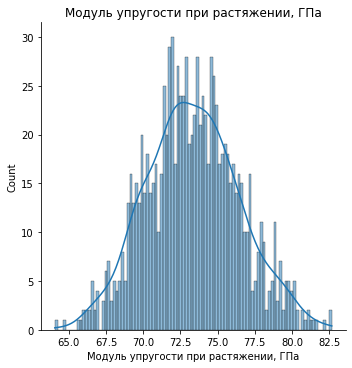

In [87]:
sns.displot(df['Модуль упругости при растяжении, ГПа'], bins=100, kde=True)
plt.title('Модуль упругости при растяжении, ГПа');

In [62]:
test_shapiro = stats.shapiro(df['Модуль упругости при растяжении, ГПа'])

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.9977321624755859, pvalue=0.17400671541690826)
Распределение нормальное


Проверим распределение целевой переменной Прочность при растяжении, МПа

<IPython.core.display.Javascript object>

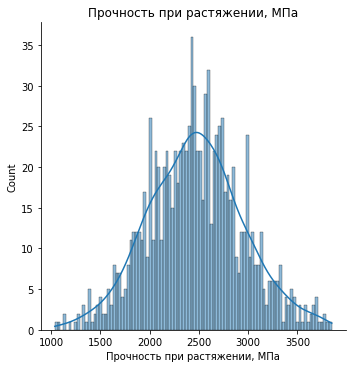

In [88]:
sns.displot(df['Прочность при растяжении, МПа'], bins=100, kde=True)
plt.title('Прочность при растяжении, МПа');

In [64]:
test_shapiro = stats.shapiro(df['Прочность при растяжении, МПа'])

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.9978815913200378, pvalue=0.22080834209918976)
Распределение нормальное


In [74]:
#Создадим переменную для названия всех столбцов. 

df.columns
#column_names = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
#         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
#         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
#        "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
column_names = df.columns

# Визуализируем  данные 


<IPython.core.display.Javascript object>

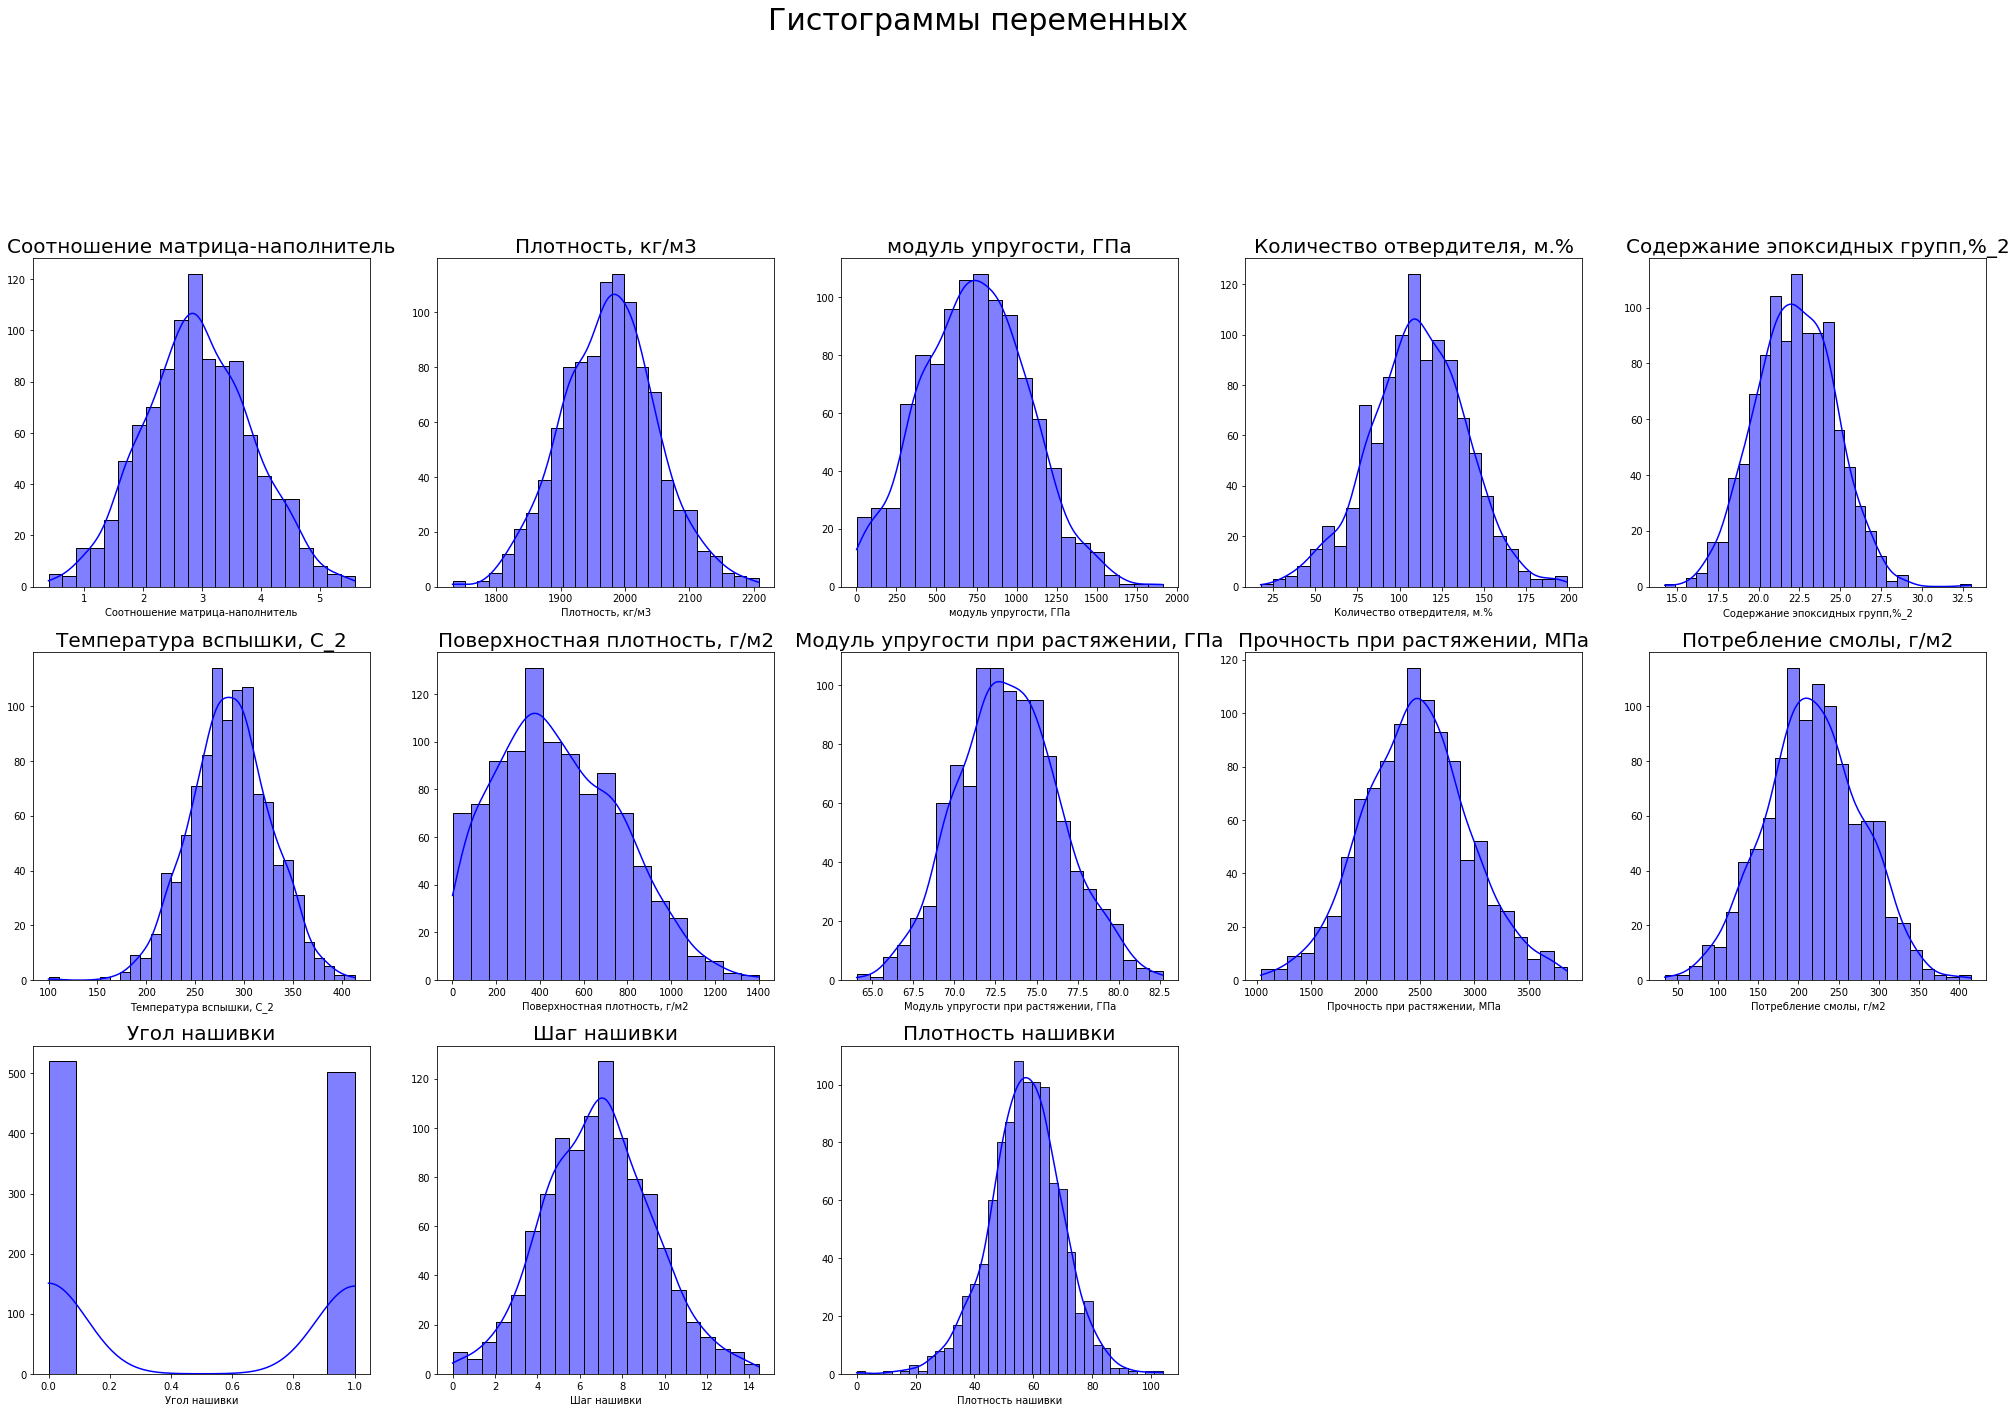

In [89]:
# Гистограмма распределения 
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter
plt.figure(figsize = (35,35))
plt.suptitle('Гистограммы переменных', fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.histplot(data = df[col], kde=True, color = "blue")
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1

#Данные стремятся к нормальному распределению практически везде, кроме угла нашивки, имеющим только 2 значения, с которым мы уже поработали ранее. 

In [67]:
test_shapiro = stats.shapiro(df['Поверхностная плотность, г/м2'])

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.9775959849357605, pvalue=1.848812249127807e-11)
Распределение не нормальное


In [68]:
# Проведем логорифмирование признака Поверхностная плотность. 
log = np.log(df['Поверхностная плотность, г/м2'])

In [69]:
test_shapiro = stats.shapiro(log)

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.8389167785644531, pvalue=6.193642588861147e-31)
Распределение не нормальное


Даже после логорифмирования распредление в признаке Поверхностная плотность ненормальна.

Для визуализации выбросов построим диаграммы boxplot

<IPython.core.display.Javascript object>

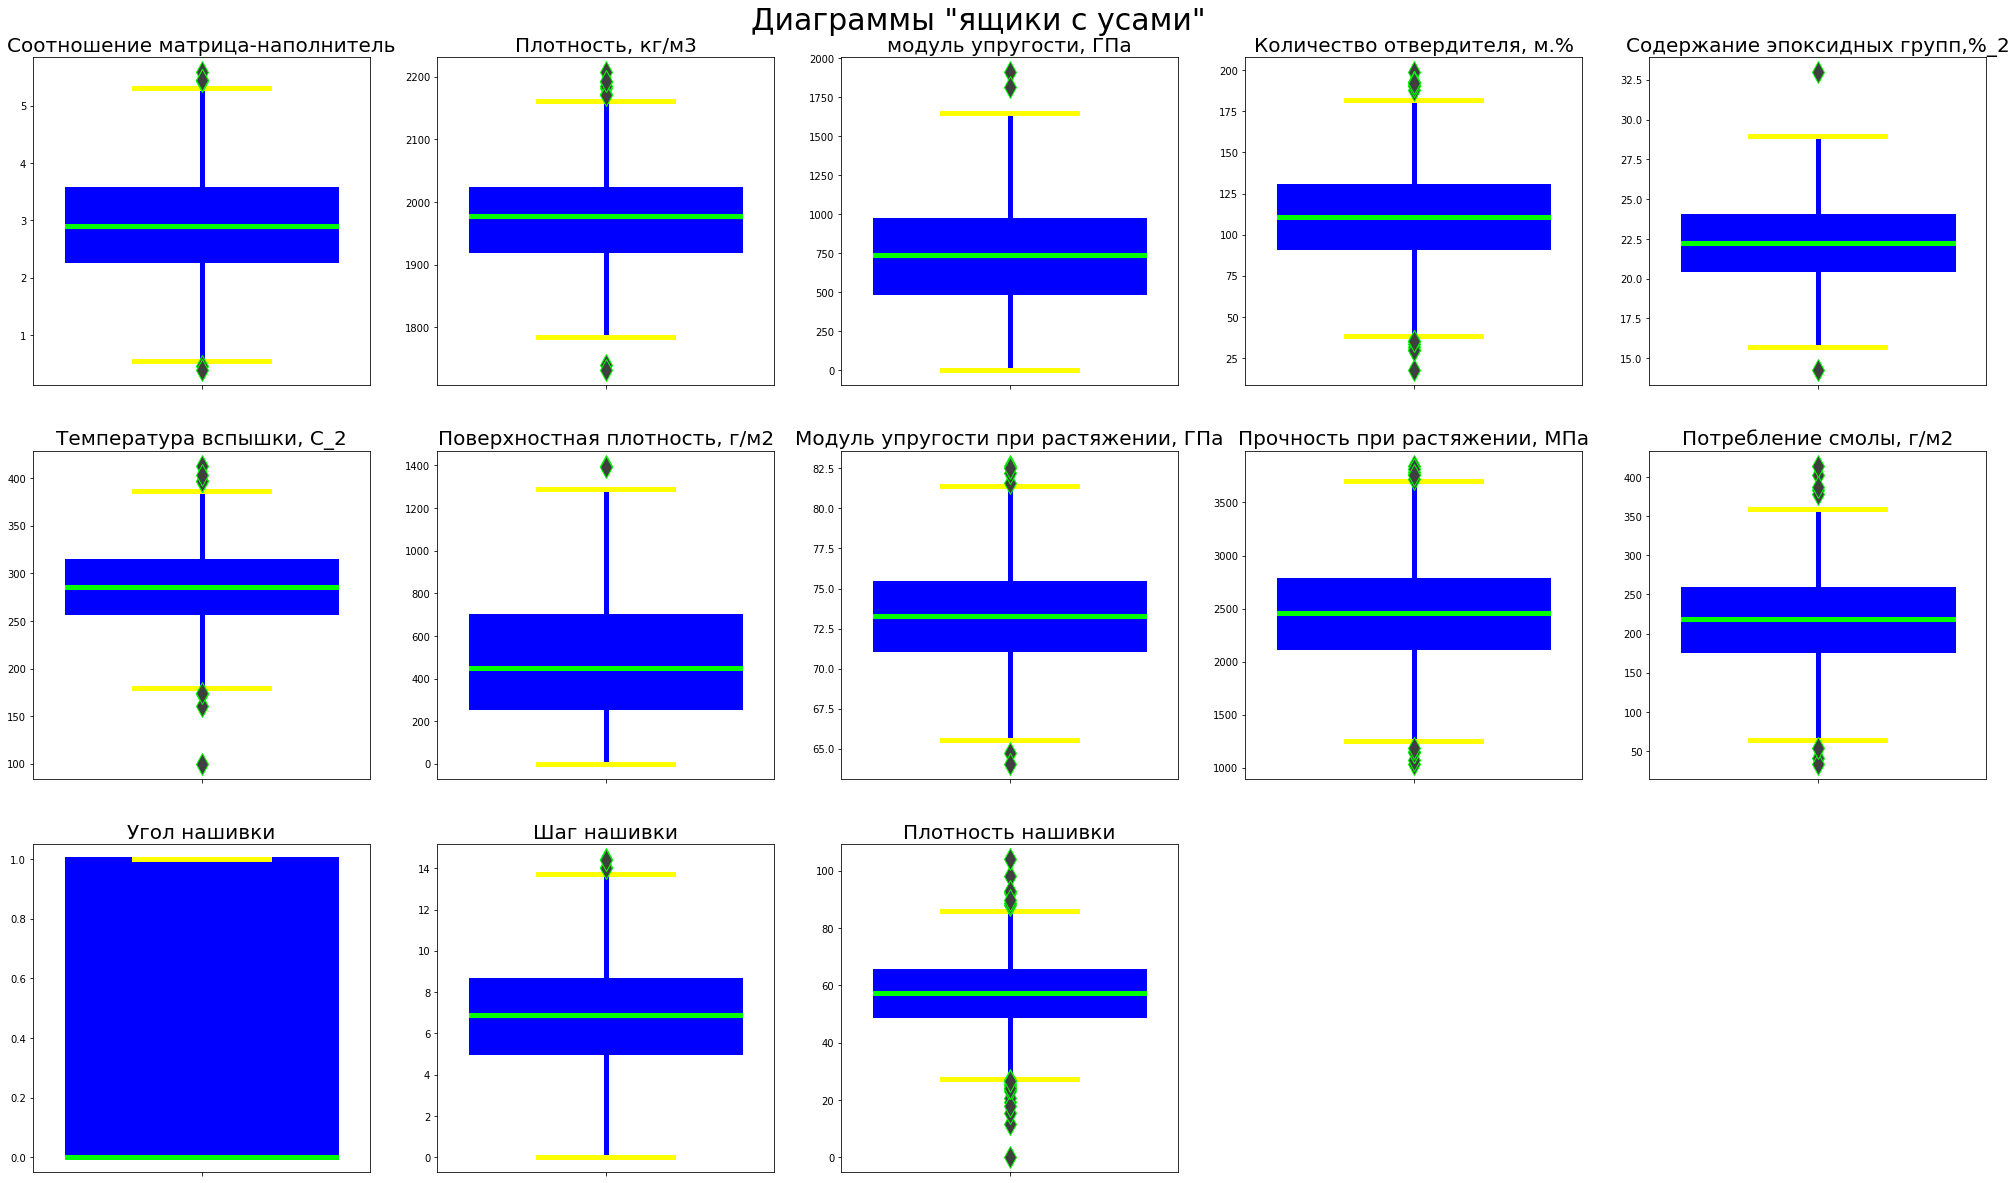

In [90]:
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter

plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y = df[col], fliersize = 15, linewidth = 5, boxprops = dict(facecolor = 'y', color = 'b'), medianprops = dict(color = 'lime'), whiskerprops = dict(color="b"), capprops = dict(color = "yellow"), flierprops = dict(color="y", markeredgecolor = "lime"))
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1
# "Ящики с усами" показывают наличие выбросов во всех столбцах, кроме углов нашивки

Проверим есть ли зависимости между признаками и между признаками и целевыми переменными.

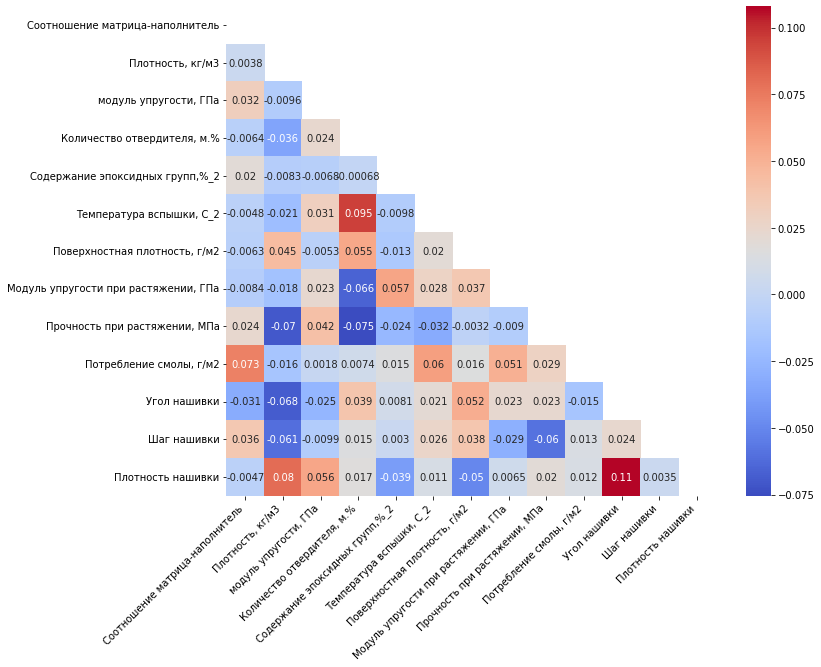

In [80]:
#Визуализация корреляционной матрицы с помощью тепловой карты
mask = np.triu(df.corr())
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (11, 9))
# # Визуализируем данные кореляции и создаем цветовую палитру
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'coolwarm')
plt.xticks(rotation = 45, ha='right')
plt.show()
# Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. 
# Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

<IPython.core.display.Javascript object>

<Figure size 360x360 with 0 Axes>

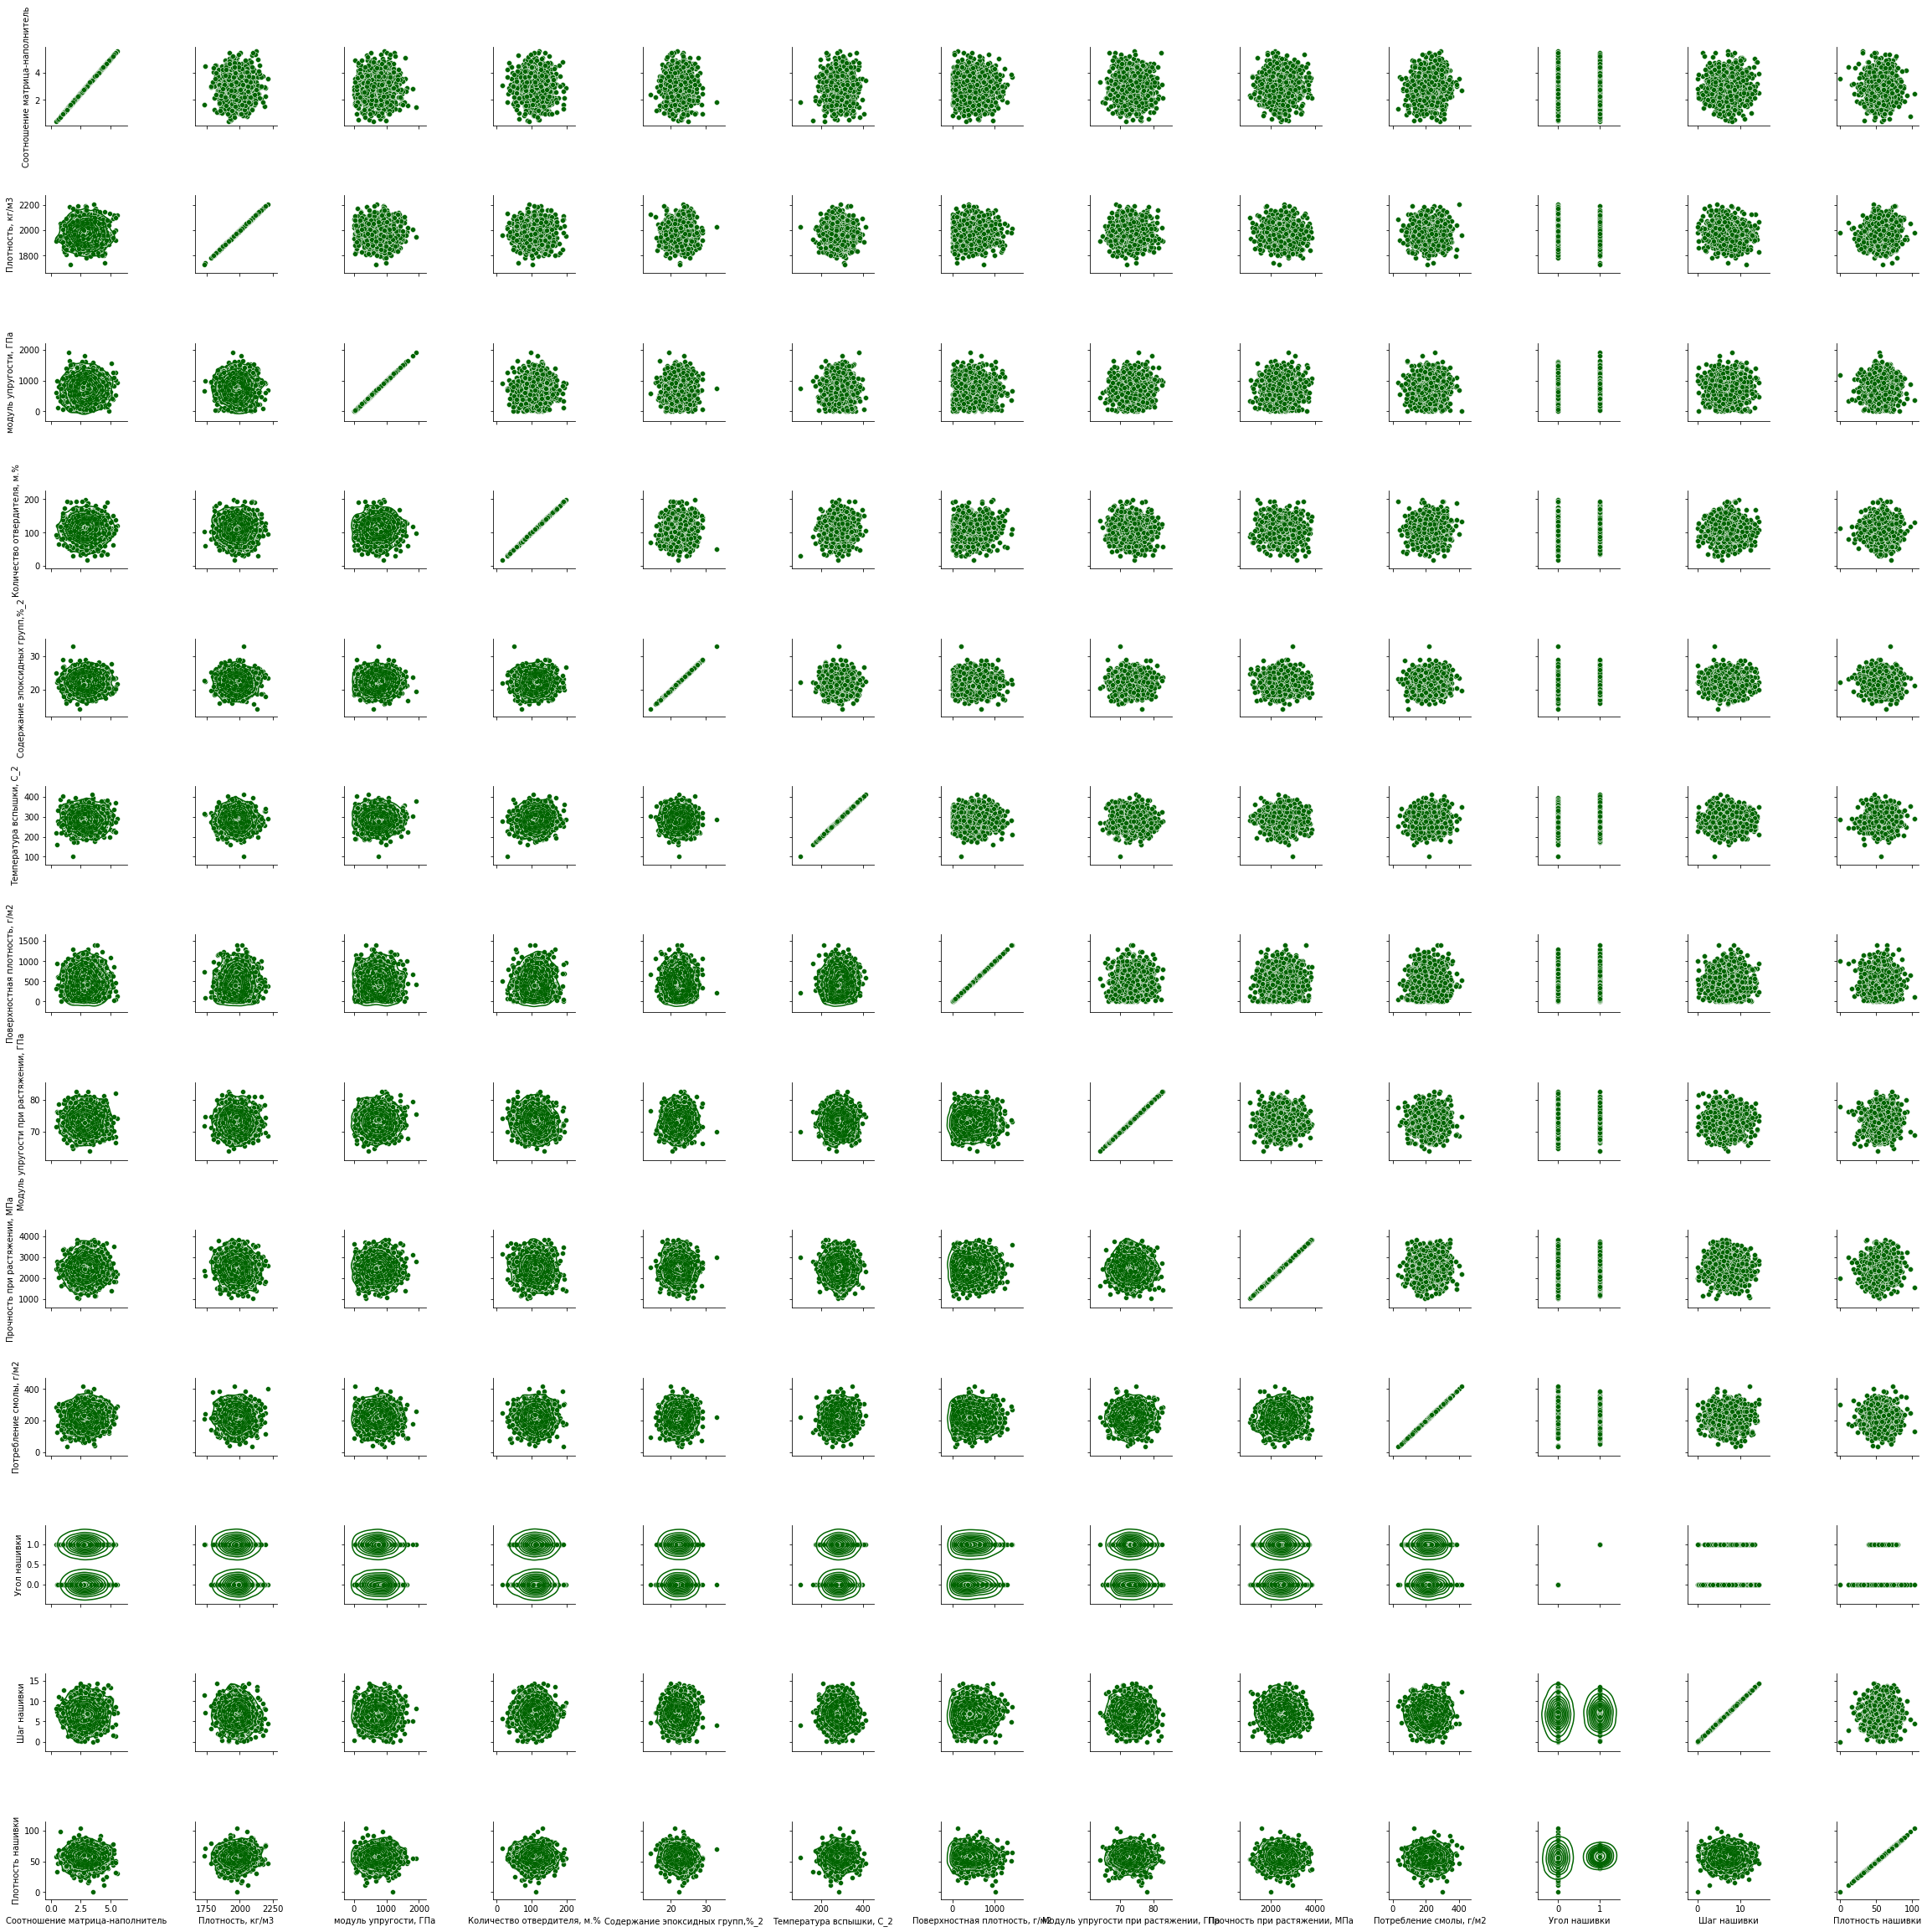

<Figure size 360x360 with 0 Axes>

In [91]:
# Попарные графики рассеяния точек - скаттерплоты 
g = sns.PairGrid(df[df.columns])
g.map(sns.scatterplot, color = 'darkgreen')
g.map_upper(sns.scatterplot, color = 'darkgreen')
g.map_lower(sns.kdeplot, color = 'darkgreen')
plt.show
plt.figure(figsize = (5,5))
# Корреляции нет

Корреляция между признаками слабая.

In [83]:
# загружаем данные и удаляем стоблец unnamed
df = pd.read_excel("df_final.xlsx")
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)],
         axis=1,
           inplace=True)

df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [79]:
#Создадим переменную для названия всех столбцов. Это нам пригодится при построении моделей. 
#column_names = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
#         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
#         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
#        "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
column_names = df.columns

Визуализация данных показала, что есть выбросы. Удалим их с помощью метода межквартильных расстояний.

In [78]:
#Создадим переменную со списком всех параметров, в которых есть выбросы
df.columns
column_list_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [101]:
for i in column_list_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

<IPython.core.display.Javascript object>

In [102]:
#Посмотрим на сумму выбросов по каждому из столбцов
df.isnull().sum()

<IPython.core.display.Javascript object>

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [103]:
#Удаляем строки c выбросами
df_clean = df.dropna(axis=0)

<IPython.core.display.Javascript object>

In [104]:
#И еще раз посмотрим на сумму выбросов по каждому из столбцов, чтобы убедиться, что все работает
df_clean.isnull().sum()

<IPython.core.display.Javascript object>

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [105]:
#Просмотрим информацию о финальном датасете после удаления пропусков. Видим, что строк стало меньше
df_clean.info()
# После удаления выбросов в датасете осталось 936 строк 

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки                          936 non-null    int64  
 11  Шаг нашивки       

In [111]:
# Посмотрим на средние и медианные знчения датасета после выбросов 
mean_and_50 = df_clean.describe()
mean_and_50.loc[['mean', '50%']].T
# Убедимся, что после удаления выбросов среднее и медианное значение остались в пределах предыдущих значений

<IPython.core.display.Javascript object>

,mean,50%
Соотношение матрица-наполнитель,2.925683,2.904731
"Плотность, кг/м3",1974.040023,1977.258043
"модуль упругости, ГПа",738.247627,738.736842
"Количество отвердителя, м.%",110.916216,111.113175
"Содержание эпоксидных групп,%_2",22.209030,22.184713
"Температура вспышки, С_2",286.040414,286.024118
"Поверхностная плотность, г/м2",482.993901,457.732246
"Модуль упругости при растяжении, ГПа",73.305127,73.259230
"Прочность при растяжении, МПа",2467.488822,2457.959767
"Потребление смолы, г/м2",217.613374,218.388715


In [135]:
df_clean.describe().T

<IPython.core.display.Javascript object>

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,936.0000000000,2.9256833818,0.8937115835,0.5473910074,2.3219309247,2.9047306962,3.5466496740,5.3141436851
"Плотность, кг/м3",936.0000000000,1974.0400234046,70.8081204212,1784.4822452486,1923.4437475016,1977.2580428731,2020.1587640900,2161.5652164639
"модуль упругости, ГПа",936.0000000000,738.2476267606,328.7086654344,2.4369087535,498.5771575874,738.7368421053,958.4189934683,1649.4157058759
"Количество отвердителя, м.%",936.0000000000,110.9162157105,27.0378907599,38.6685003344,92.5238162303,111.1131750246,130.0014503327,181.8284477949
"Содержание эпоксидных групп,%_2",936.0000000000,22.2090304705,2.3948709278,15.6958938036,20.5715156044,22.1847125320,23.9618179561,28.9550943746
"Температура вспышки, С_2",936.0000000000,286.0404142480,39.4006766709,179.3743913704,259.1844862340,286.0241175322,312.9914246706,386.0679917795
"Поверхностная плотность, г/м2",936.0000000000,482.9939014162,280.1903767287,0.6037399252,266.0040987583,457.7322458016,695.9008623245,1291.3401146354
"Модуль упругости при растяжении, ГПа",936.0000000000,73.3051265976,3.0373805443,65.5533359101,71.2488233522,73.2592296013,75.3107884276,81.4171259445
"Прочность при растяжении, МПа",936.0000000000,2467.4888220121,463.8389109846,1250.3928022050,2146.9360340668,2457.9597673317,2755.1694854706,3705.6725233617
"Потребление смолы, г/м2",936.0000000000,217.6133742004,57.8272554341,63.6856983308,179.4890912192,218.3887147058,256.3967766428,359.0522197897


In [107]:
df_clean.to_excel('final_df\df_clean.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

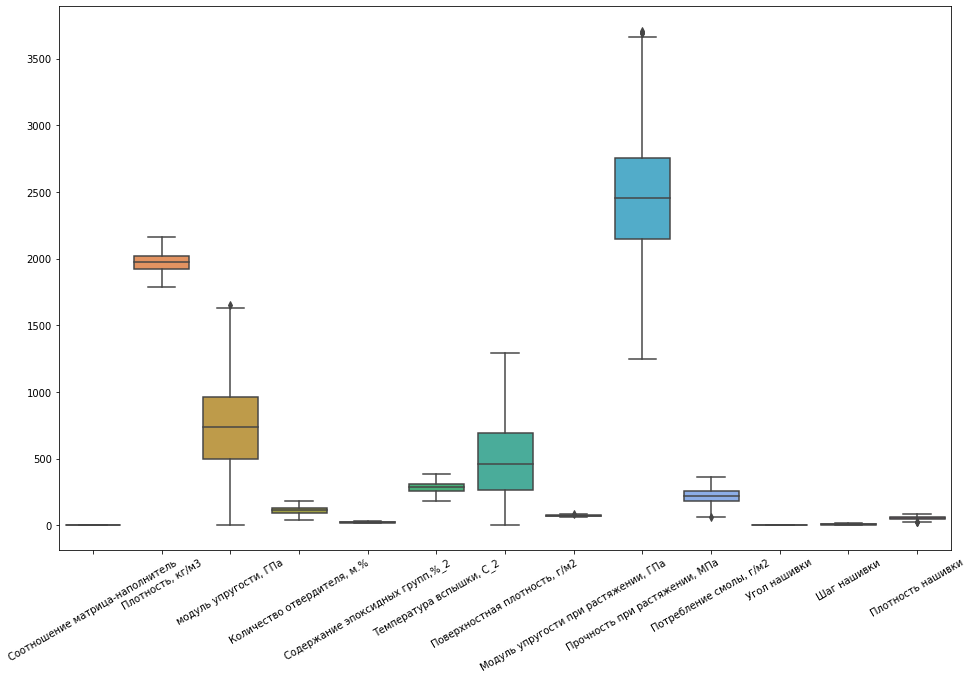

In [117]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_clean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [119]:
#Нормализуем данные с помощью StandarScaler() 
scaler = preprocessing.StandardScaler()
col = df.columns
result = scaler.fit_transform(df_clean)

df_standard = pd.DataFrame(result, columns = col)
df_standard.describe()

<IPython.core.display.Javascript object>

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-3.985416e-16,-1.040004e-15,1.480297e-16,-4.934325e-17,-8.264994e-16,2.827748e-16,1.537232e-16,-4.531987e-15,7.591269e-16,-1.622634e-16,1.214603e-16,-2.068621e-16,-1.821904e-16
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-2.662564e+00,-2.678494e+00,-2.239686e+00,-2.673520e+00,-2.721073e+00,-2.708660e+00,-1.722572e+00,-2.553495e+00,-2.625366e+00,-2.663276e+00,-1.023787e+00,-2.742040e+00,-2.686557e+00
25%,-6.759174e-01,-7.149367e-01,-7.295171e-01,-6.806090e-01,-6.841247e-01,-6.819752e-01,-7.748511e-01,-6.773608e-01,-6.914559e-01,-6.596313e-01,-1.023787e+00,-7.098730e-01,-6.447102e-01
50%,-2.345711e-02,4.547134e-02,1.489090e-03,7.288461e-03,-1.015960e-02,-4.138363e-04,-9.020710e-02,-1.511879e-02,-2.055487e-02,1.341504e-02,9.767656e-01,1.106404e-02,1.178012e-02
75%,6.951888e-01,6.516681e-01,6.701651e-01,7.062473e-01,7.322835e-01,6.843897e-01,7.602716e-01,6.606792e-01,6.205483e-01,6.710354e-01,9.767656e-01,6.681197e-01,6.539752e-01
max,2.673947e+00,2.649773e+00,2.773444e+00,2.624101e+00,2.818386e+00,2.540085e+00,2.886532e+00,2.672150e+00,2.670853e+00,2.447193e+00,9.767656e-01,2.717671e+00,2.542482e+00


<IPython.core.display.Javascript object>

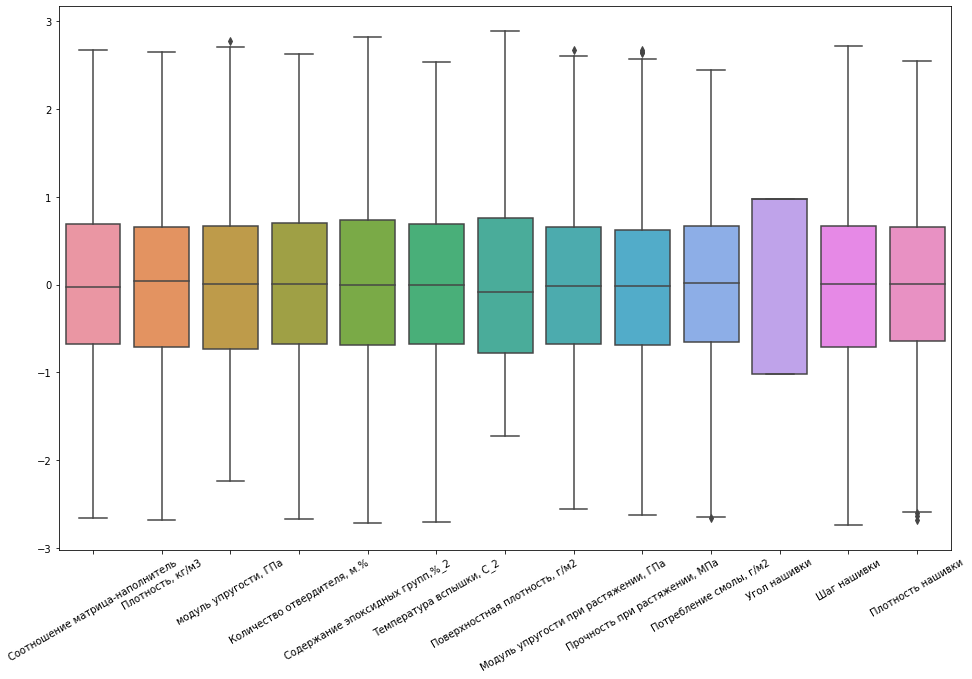

In [120]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_standard)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [132]:
mean_and_50 = df_clean.describe()
mean_and_50.loc[['mean', '50%']].T

<IPython.core.display.Javascript object>

,mean,50%
Соотношение матрица-наполнитель,2.9256833818,2.9047306962
"Плотность, кг/м3",1974.0400234046,1977.2580428731
"модуль упругости, ГПа",738.2476267606,738.7368421053
"Количество отвердителя, м.%",110.9162157105,111.1131750246
"Содержание эпоксидных групп,%_2",22.2090304705,22.1847125320
"Температура вспышки, С_2",286.0404142480,286.0241175322
"Поверхностная плотность, г/м2",482.9939014162,457.7322458016
"Модуль упругости при растяжении, ГПа",73.3051265976,73.2592296013
"Прочность при растяжении, МПа",2467.4888220121,2457.9597673317
"Потребление смолы, г/м2",217.6133742004,218.3887147058


In [133]:
mean_and_50 = df_standard.describe()
mean_and_50.loc[['mean', '50%']].T


<IPython.core.display.Javascript object>

,mean,50%
Соотношение матрица-наполнитель,-0.0000000000,-0.0234571059
"Плотность, кг/м3",-0.0000000000,0.0454713366
"модуль упругости, ГПа",0.0000000000,0.0014890903
"Количество отвердителя, м.%",-0.0000000000,0.0072884610
"Содержание эпоксидных групп,%_2",-0.0000000000,-0.0101596036
"Температура вспышки, С_2",0.0000000000,-0.0004138363
"Поверхностная плотность, г/м2",0.0000000000,-0.0902070985
"Модуль упругости при растяжении, ГПа",-0.0000000000,-0.0151187949
"Прочность при растяжении, МПа",0.0000000000,-0.0205548712
"Потребление смолы, г/м2",-0.0000000000,0.0134150412
